In [2]:
import numpy as np
import ipynb_importer
import re
import matplotlib.ticker
from matplotlib import pyplot as plt
from matplotlib import font_manager
class MyLocator(matplotlib.ticker.AutoMinorLocator):
    def __init__(self, n=2):
        super().__init__(n=n)
matplotlib.ticker.AutoMinorLocator = MyLocator
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
from scipy import optimize
import math
from scipy import signal

import MPten_convol_main

importing Jupyter notebook from MPten_convol_main.ipynb


UTS: 878.1750000000001MPa
Elongation: 89.99876%
UTS: 878.1750000000001MPa
Elongation: 89.99876%
UTS: 998.865MPa
Elongation: 154.67582%
UTS: 998.865MPa
Elongation: 154.67582%
R2_hat: 0.996926166669409
Yield point+0.2: 7.378749999999999 %
Yield strength fitted: 374.31078947368417 MPa
Yield point elastic limit: 6.4058340000000005 %
Yield elastic limit: 324.01500000000004 MPa
UTS strain: 146.96300552330206 %
Uniform strain: 131.6092769453343 %


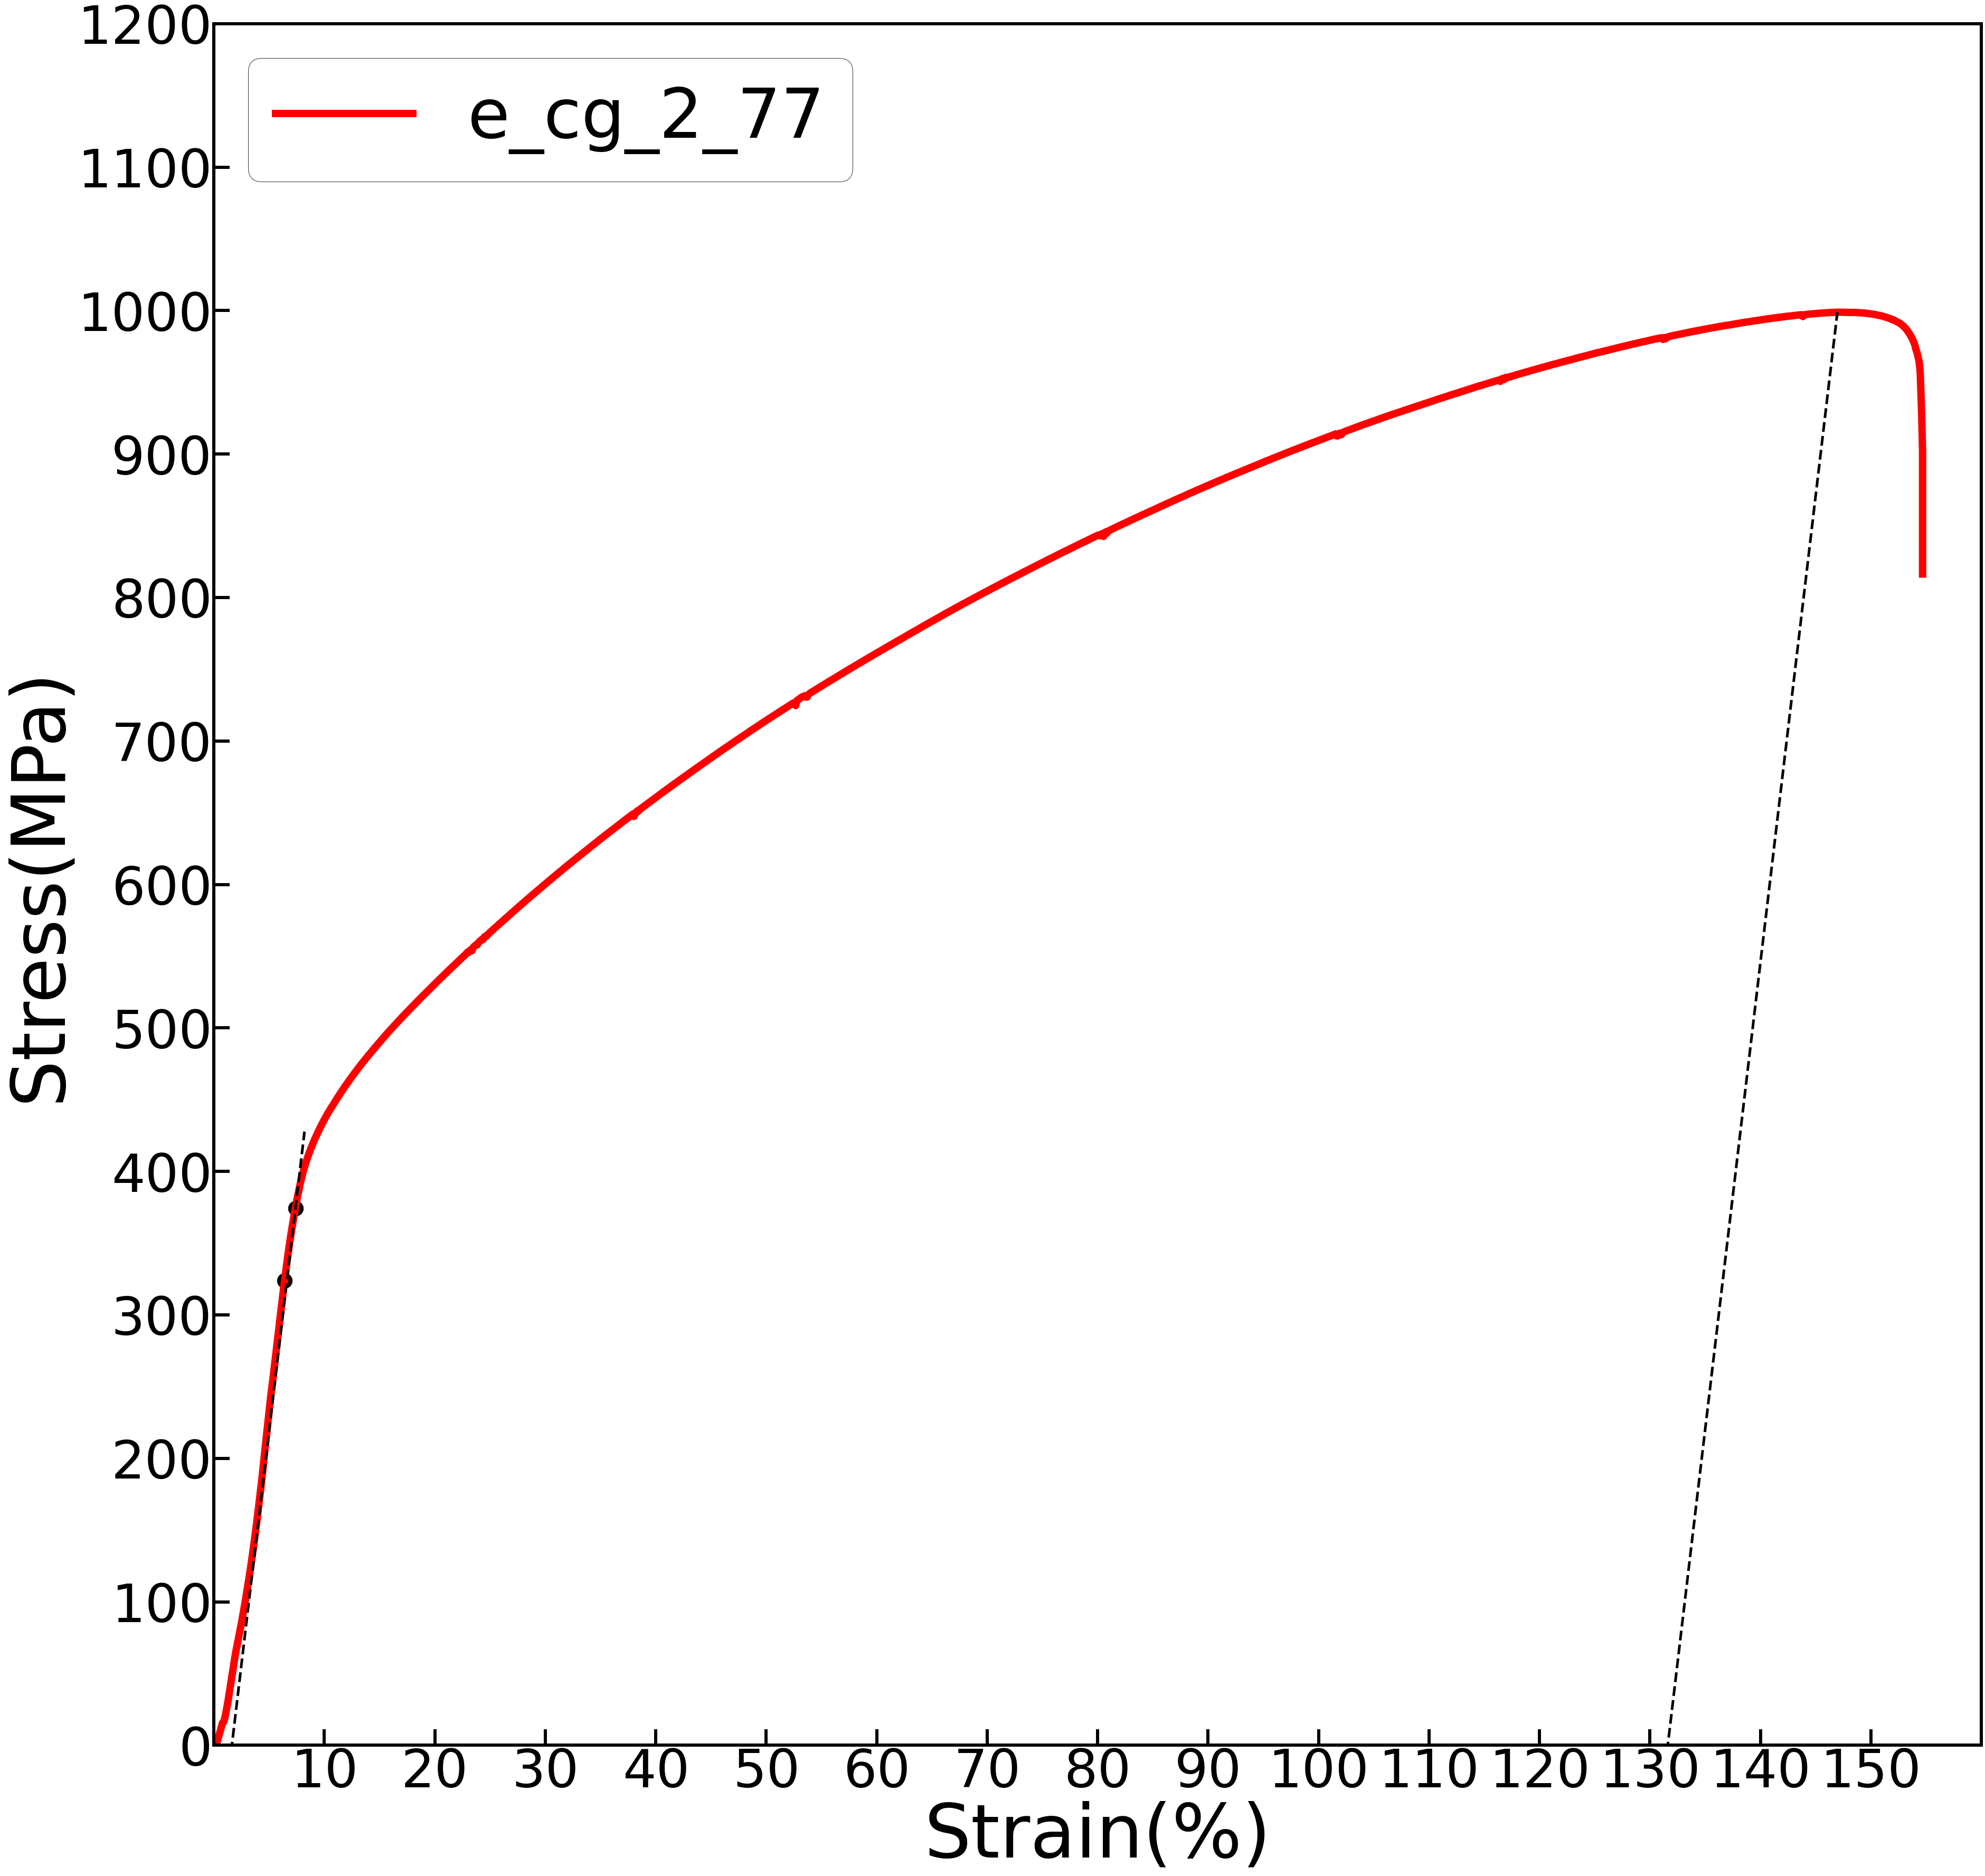

calc_cost: 1.2898283004760742


In [4]:
#*3333_77
#csvfiles15_3_77 = MPten_convol_main.merge_file('/Users/wz/OneDrive/OneDrive - Kyoto University/MPdata/20210816ten77', 'csv')
csvfilese_cg_2_77 = MPten_convol_main.merge_file('C:/Users/yaoho/OneDrive - Kyoto University/MPdata/20220120', 'csv')
resultstraine_cg_2_77, resultstresse_cg_2_77 = MPten_convol_main.resultdata_gen(csvfiles = csvfilese_cg_2_77, Thickness5 = 2.0, Width5 = 1.9, l = 5)
resultstraine_cg_2_77, resultstresse_cg_2_77 = MPten_convol_main.remove_nan(resultstraine_cg_2_77), MPten_convol_main.remove_nan(resultstresse_cg_2_77)
resultstrain_e_cg_2_77, resultstress_e_cg_2_77, resultstrain_smoothe_cg_2_77, resultstress_smoothe_cg_2_77 = MPten_convol_main.convol_smooth(
    resultstraink = resultstraine_cg_2_77, resultstressk = resultstresse_cg_2_77, cut_pt = 0, convol_N = 20)
MPten_convol_main.elastic_main_plot(sp = 1000, fit_len = 2000, step = 25, cutfr = 15,
                     range_op = 0, range_ed = 8, 
                     resultstrain1 = resultstrain_e_cg_2_77, resultstress1 = resultstress_e_cg_2_77,
                    dis_x = 160, dis_y = 1200,
                    sample_name = 'e_cg_2_77',
                 resultstrain_plot = resultstrain_smoothe_cg_2_77, resultstress_plot = resultstress_smoothe_cg_2_77)

del resultstrain_smoothe_cg_2_77[-100:]
del resultstress_smoothe_cg_2_77[-100:]

No handles with labels found to put in legend.


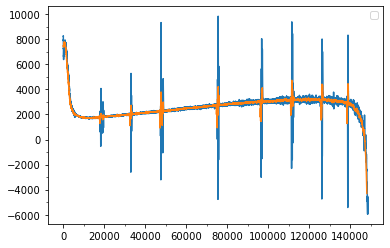

In [5]:
del resultstrain_e_cg_2_77[-150:]
del resultstress_e_cg_2_77[-150:]
def np_move_avg(a, n, mode = 'valid'):
    return(np.convolve(a, np.ones((n,))/n, mode = mode))
    
strain_1, stress_1 = np.array(resultstrain_e_cg_2_77), np.array(resultstress_e_cg_2_77)
xrd_y1 = signal.savgol_filter(stress_1, int(10000/4+1), 1)
xrd_x1 = np.linspace(strain_1[0], strain_1[-1], len(xrd_y1))

true_strain_3333 = np.log(1 + strain_1/100)
true_stress_3333 = stress_1*(1 + strain_1/100)
true_stress_dev1_3333 = np.gradient(true_stress_3333)[5000:-1000]/np.gradient(true_strain_3333)[5000:-1000]
true_stress_dev1_3333_win100 = np_move_avg(true_stress_dev1_3333, 100, mode = 'valid')
true_stress_dev1_3333_win500 = np_move_avg(true_stress_dev1_3333, 500, mode = 'valid')

plt.plot(true_stress_dev1_3333_win100)
plt.plot(true_stress_dev1_3333_win500)
# plt.plot(xrd_x1, xrd_y1)
# plt.plot(strain_1, stress_1, label='raw')

plt.legend()

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


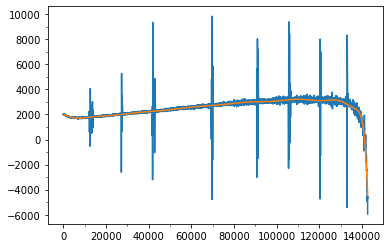

In [7]:
true_stress_1 = true_stress_dev1_3333_win100[5700:]
true_stress_0 = true_stress_dev1_3333_win100[:5700]
true_strain_1 = np.linspace(1, len(true_stress_1), len(true_stress_1))

k = np.polyfit(true_strain_1, true_stress_1, 20)
y_reg =  np.poly1d(k)(true_strain_1)

plt.plot(true_strain_1, true_stress_1)
plt.plot(true_strain_1, y_reg)

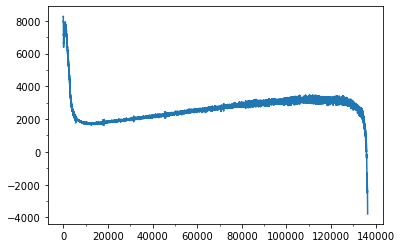

In [13]:
true_dev1_new, abnormal_list = [], []

for i in range(len(true_stress_1)):
    true_stress_ = true_stress_1[i]
    fit_stress_ = y_reg[i]
    if abs(fit_stress_ - true_stress_) > 1*i/1000+150:
        abnormal_list.append(i)

for i in range(len(true_stress_1)):
    if i not in abnormal_list:
        true_dev1_new.append(true_stress_1[i])

true_stress_3333_dev = true_stress_0.tolist() + true_dev1_new

plt.plot(true_stress_3333_dev)

<ipython-input-343-40a6e55dfaea>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(np.linspace(0, 180, 10), fontsize=60)
<ipython-input-343-40a6e55dfaea>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.linspace(0, 1200, 7), fontsize=60)
<ipython-input-343-40a6e55dfaea>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(np.linspace(0, 100, 11), fontsize=60)
<ipython-input-343-40a6e55dfaea>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.linspace(0, 8000, 9), fontsize=60)


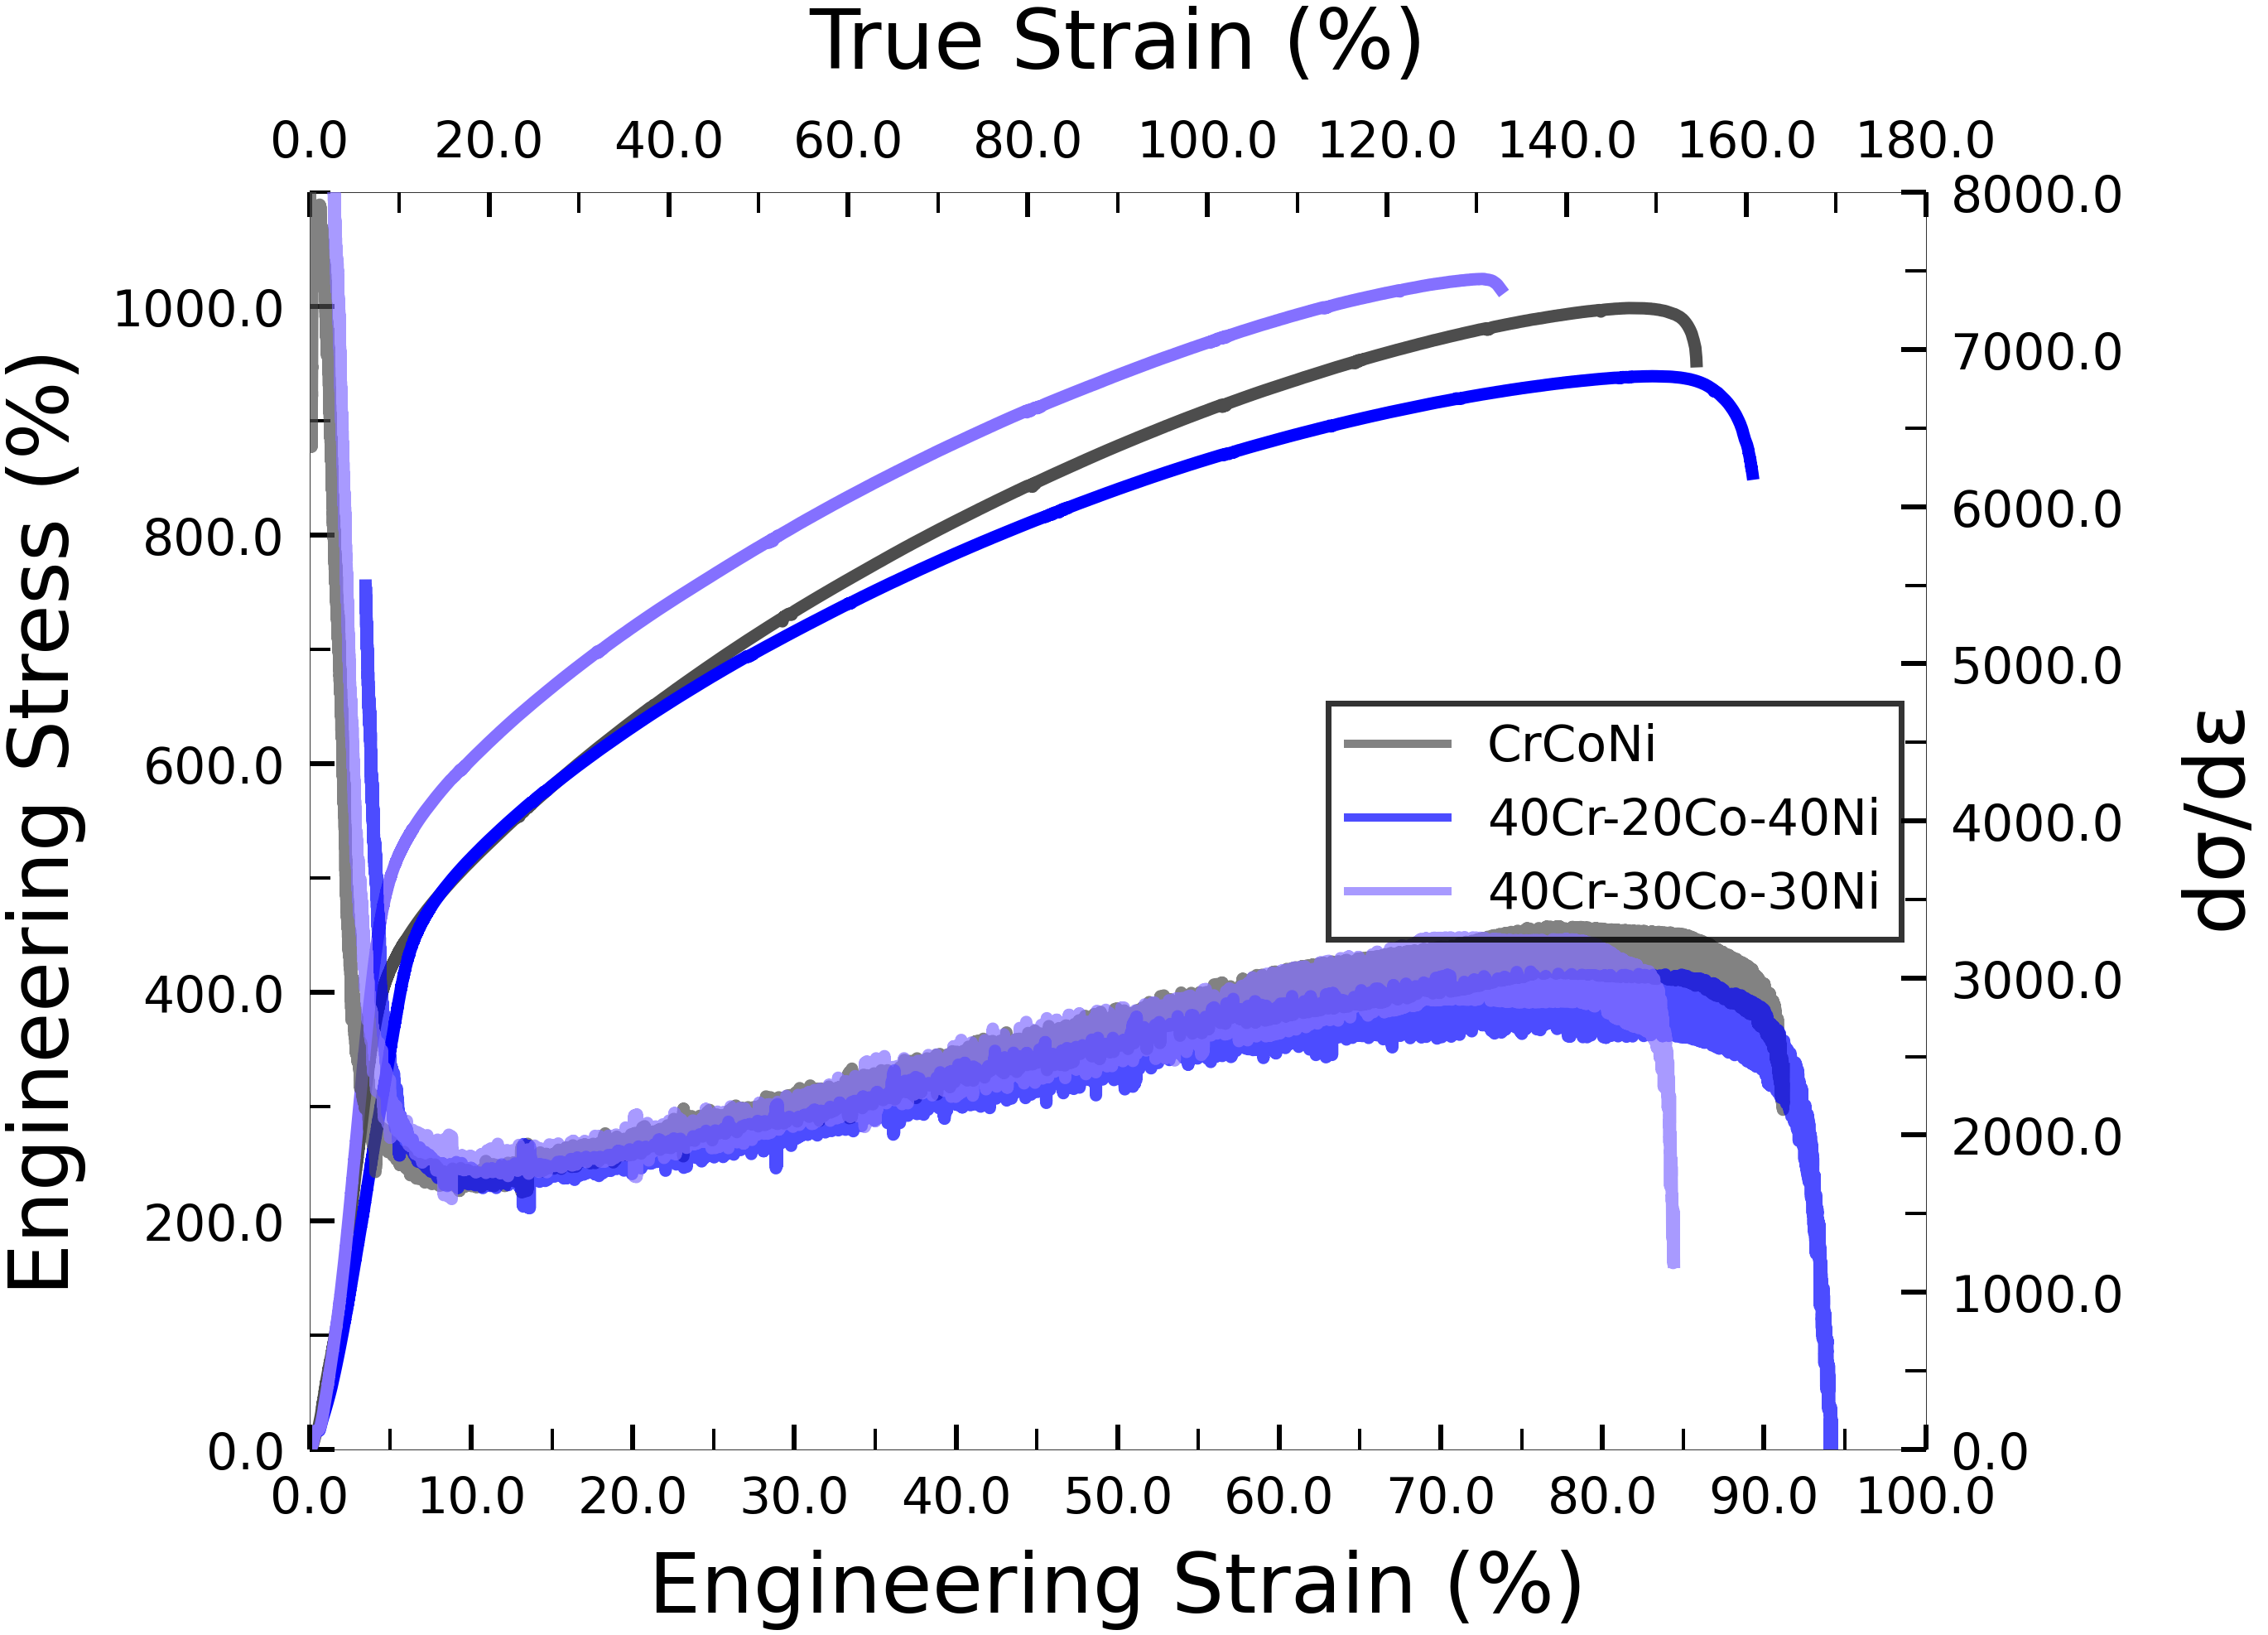

In [343]:
plt.rcParams["figure.figsize"] = [40, 30]
plt.rcParams["figure.autolayout"] = True

fig=plt.figure()
ax1=fig.add_subplot(111, label="MSAD-Strength")
ax2=fig.add_subplot(111, label="SFE-Ductility", frame_on = False)
ax1.tick_params(labelsize = 23, which = 'major', length = 30, width = 6, direction='in', color = 'k')
ax1.tick_params(which = 'minor', length = 25, width = 4, direction='in', color = 'k')#刻度线参数设置
ax2.tick_params(labelsize = 23, which = 'major', length = 30, width = 6, direction='in', color = 'k')
ax2.tick_params(which = 'minor', length = 25, width = 4, direction='in', color = 'k')#刻度线参数设置

ax1.xaxis.tick_top()
ax1.yaxis.tick_left()
ax1.axis([0, 180, 0, 1100])
ax1.set_xticklabels(np.linspace(0, 180, 10), fontsize=60)
ax1.set_yticklabels(np.linspace(0, 1200, 7), fontsize=60)
ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10))
ax1.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(6))
ax1.set_xlabel('Engineering Strain (%)', fontsize = 100, labelpad=120)
ax1.set_ylabel('Engineering Stress (%)', fontsize = 100, labelpad=30)
# true_3333 = np.linspace(0, true_strain_3333[-1]*100, len(true_stress_3333))
ax1.plot(resultstrain_e_cg_2_77[:-200], resultstress_e_cg_2_77[:-200], color = '#4D4D4D', linewidth = 15,
        label = 'CrCoNi')
ax1.plot(resultstrain_4020_1_77, resultstress_4020_1_77, color = '#0000FF', linewidth = 15,
        label = '40Cr-20Co-40Ni')
ax1.plot(resultstrain_4030_2_77, resultstress_4030_2_77, color = '#8470FF', linewidth = 15,
        label = '40Cr-30Co-30Ni')

ax2.xaxis.tick_bottom()
ax2.yaxis.tick_right()
ax2.axis([0, 100, 0, 8000])
ax2.set_xticklabels(np.linspace(0, 100, 11), fontsize=60)
ax2.set_yticklabels(np.linspace(0, 8000, 9), fontsize=60)
ax2.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10))
ax2.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(9))
ax2.set_xlabel('True Strain (%)', fontsize = 100, labelpad=150)
ax2.set_ylabel('$\mathregular{d\sigma/d\epsilon}$', fontsize = 100, labelpad=70)
ax2.xaxis.set_label_position('top')
ax2.yaxis.set_label_position('right')

true_3333 = np.linspace(0, true_strain_3333[-1]*100, len(true_stress_3333_dev))
ax2.plot(true_3333, true_stress_3333_dev, color = '#4D4D4D', linewidth = 15,
        label = 'CrCoNi', alpha=0.7)

true_4020 = np.linspace(0, true_strain_4020[-4001]*100, len(true_stress_4020_dev))
ax2.plot(true_4020[5000:], true_stress_4020_dev[5000:], color = '#0000FF', linewidth = 15,
        label = '40Cr-20Co-40Ni', alpha=0.7)

true_4030 = np.linspace(0, true_strain_4030[-1]*100, len(true_stress_4030))
ax2.plot(true_4030, true_stress_4030, color = '#8470FF', linewidth = 15,
        label = '40Cr-30Co-30Ni', alpha=0.7)

legend = ax2.legend(fontsize = 60, loc = 'center right', frameon = True, 
                   fancybox = 0, ncol = 1)
legend.get_frame().set_facecolor('none')#图例颜色等设置
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(7)
for legobj in legend.legendHandles:
    legobj.set_linewidth(10)

ax1.tick_params(pad = 30)
ax2.tick_params(pad = 30)
plt.show()

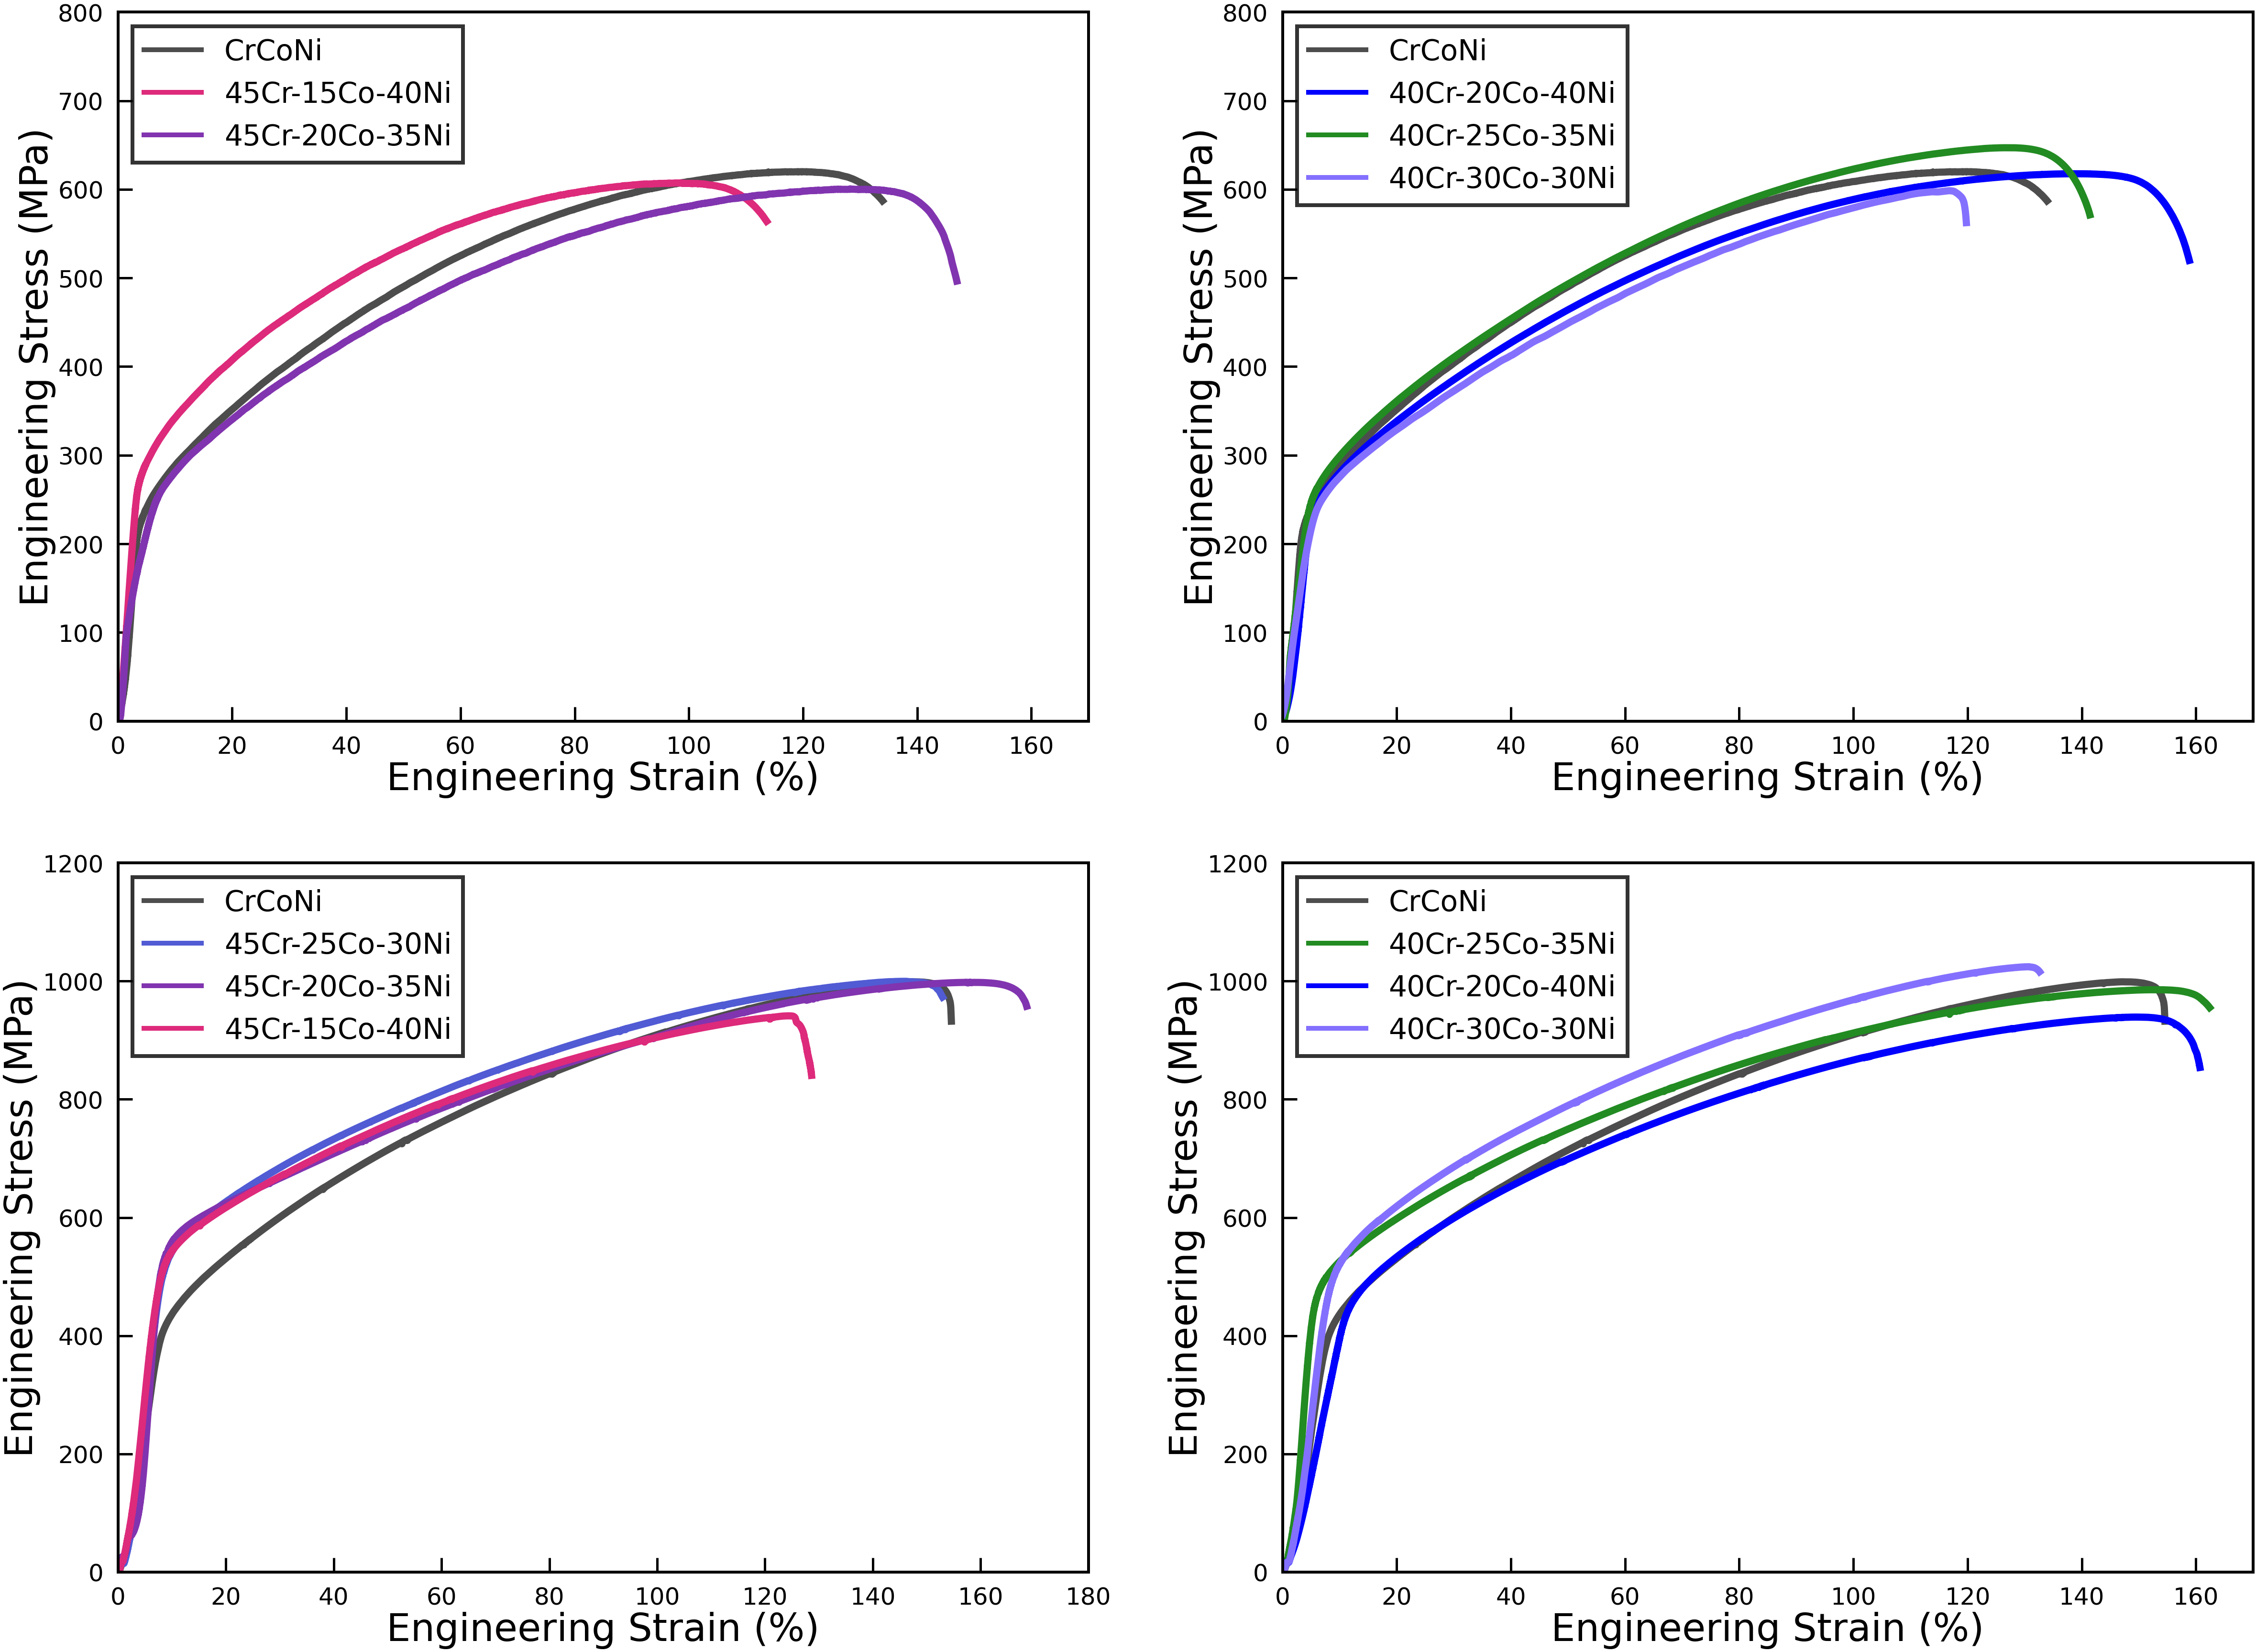

In [18]:
class MyLocator(matplotlib.ticker.AutoMinorLocator):
    def __init__(self, n=2):
        super().__init__(n=n)
matplotlib.ticker.AutoMinorLocator = MyLocator  

new_ticksx = np.linspace(0, 200, 11)
new_ticksy = np.linspace(0, 1200, 7)
figsize = 80, 60
figure, ax = plt.subplots(figsize = figsize)

#*45_rt
ax1 = plt.subplot(2,2,1)
ax1.set_xlabel('Engineering Strain (%)', fontsize = 80, c = 'k')
ax1.set_ylabel('Engineering Stress (MPa)', fontsize = 80, c = 'k')
ax1.set_xticks(new_ticksx, minor=True)
ax1.set_yticks(new_ticksy, minor=True)
ax1.tick_params(length=30, width=5, direction='in')
ax1.axis([0, 170, 0, 800])
# ax.tick_params(pad = 30)
bwith = 6
ax1.spines['bottom'].set_linewidth(bwith)
ax1.spines['left'].set_linewidth(bwith)
ax1.spines['top'].set_linewidth(bwith)
ax1.spines['right'].set_linewidth(bwith)
ax1.tick_params(pad = 30)
labels = ax1.get_xticklabels() + ax1.get_yticklabels()

plt.plot(resultstrain_3_e_rt, resultstress_3_e_rt, color = '#4D4D4D', linewidth = 15,
        label = 'CrCoNi')
plt.plot(np.array(resultstrain_15_2_rt), resultstress_15_2_rt, color = '#dd2a7b', linewidth = 15,
        label = '45Cr-15Co-40Ni')
plt.plot(np.array(resultstrain_4520_3_rt), resultstress_4520_3_rt, color = '#8134af', linewidth = 15,
        label = '45Cr-20Co-35Ni')

legend = ax1.legend(fontsize = 60, loc = 'upper left', frameon = True, 
                   fancybox = 0, ncol = 1)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(10)

#*40_rt
ax2 = plt.subplot(2,2,2)
ax2.set_xlabel('Engineering Strain (%)', fontsize = 80, c = 'k')
ax2.set_ylabel('Engineering Stress (MPa)', fontsize = 80, c = 'k')
ax2.set_xticks(new_ticksx, minor=True)
ax2.set_yticks(new_ticksy, minor=True)
ax2.tick_params(length=30, width=5, direction='in')
ax2.axis([0, 170, 0, 800])
# ax.tick_params(pad = 30)
bwith = 6
ax2.spines['bottom'].set_linewidth(bwith)
ax2.spines['left'].set_linewidth(bwith)
ax2.spines['top'].set_linewidth(bwith)
ax2.spines['right'].set_linewidth(bwith)
ax2.tick_params(pad = 30)
labels = ax2.get_xticklabels() + ax2.get_yticklabels()

plt.plot(resultstrain_3_e_rt, resultstress_3_e_rt, color = '#4D4D4D', linewidth = 15,
        label = 'CrCoNi')
plt.plot(resultstrain_4020_1_rt, resultstress_4020_1_rt, color = '#0000FF', linewidth = 15,
        label = '40Cr-20Co-40Ni')
plt.plot(resultstrain_4025_1_rt, resultstress_4025_1_rt, color = '#228B22', linewidth = 15,
        label = '40Cr-25Co-35Ni')
plt.plot(resultstrain_smooth4030_1_rt, resultstress_smooth4030_1_rt, color = '#8470FF', linewidth = 15,
        label = '40Cr-30Co-30Ni')

legend = ax2.legend(fontsize = 60, loc = 'upper left', frameon = True, 
                   fancybox = 0, ncol = 1)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(10)

#*45_77
ax3 = plt.subplot(2,2,3)
ax3.set_xlabel('Engineering Strain (%)', fontsize = 80, c = 'k')
ax3.set_ylabel('Engineering Stress (MPa)', fontsize = 80, c = 'k')
ax3.set_xticks(new_ticksx, minor=True)
ax3.set_yticks(new_ticksy, minor=True)
ax3.tick_params(length=30, width=5, direction='in')
ax3.axis([0, 180, 0, 1200])
# ax.tick_params(pad = 30)
bwith = 6
ax3.spines['bottom'].set_linewidth(bwith)
ax3.spines['left'].set_linewidth(bwith)
ax3.spines['top'].set_linewidth(bwith)
ax3.spines['right'].set_linewidth(bwith)
ax3.tick_params(pad = 30)
labels = ax3.get_xticklabels() + ax3.get_yticklabels()

plt.plot(np.array(resultstrain_smoothe_cg_2_77), resultstress_smoothe_cg_2_77, color = '#4D4D4D', linewidth = 15,
        label = 'CrCoNi')
plt.plot(np.array(resultstrain_25_1_77), resultstress_25_1_77, color = '#515bd4', linewidth = 15,
        label = '45Cr-25Co-30Ni')
plt.plot(np.array(resultstrain_4520_5_77), resultstress_4520_5_77, color = '#8134af', linewidth = 15,
        label = '45Cr-20Co-35Ni')
plt.plot(np.array(resultstrain_15_4_77), resultstress_15_4_77, color = '#dd2a7b', linewidth = 15,
        label = '45Cr-15Co-40Ni')
# plt.plot(np.array(resultstrain_27_1_77), resultstress_27_1_77, color = 'k', linewidth = 15,
#         label = '45Cr-27.5Co-27.5Ni')

legend = ax3.legend(fontsize = 60, loc = 'upper left', frameon = True, 
                   fancybox = 0, ncol = 1)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(10)

#*40_77
ax4 = plt.subplot(2,2,4)
ax4.set_xlabel('Engineering Strain (%)', fontsize = 80, c = 'k')
ax4.set_ylabel('Engineering Stress (MPa)', fontsize = 80, c = 'k')
ax4.set_xticks(new_ticksx)
ax4.set_yticks(new_ticksy)
ax4.tick_params(length=30, width=5, direction='in')
ax4.axis([0, 170, 0, 1200])
# ax.tick_params(pad = 30)
bwith = 6
ax4.spines['bottom'].set_linewidth(bwith)
ax4.spines['left'].set_linewidth(bwith)
ax4.spines['top'].set_linewidth(bwith)
ax4.spines['right'].set_linewidth(bwith)
ax4.tick_params(pad = 30)
labels = ax4.get_xticklabels() + ax4.get_yticklabels()

plt.plot(np.array(resultstrain_smoothe_cg_2_77), resultstress_smoothe_cg_2_77, color = '#4D4D4D', linewidth = 15,
        label = 'CrCoNi')
plt.plot(resultstrain_4025_2_77, resultstress_4025_2_77, color = '#228B22', linewidth = 15,
        label = '40Cr-25Co-35Ni')
plt.plot(resultstrain_4020_1_77, resultstress_4020_1_77, color = '#0000FF', linewidth = 15,
        label = '40Cr-20Co-40Ni')
plt.plot(resultstrain_4030_2_77, resultstress_4030_2_77, color = '#8470FF', linewidth = 15,
        label = '40Cr-30Co-30Ni')
# plt.plot(resultstrain_4040_1_77, resultstress_4040_1_77, color = '#8B1A1A', linewidth = 15,
#         label = '40Cr-40Co-20Ni')
# plt.plot(resultstrain_4040_2_77, resultstress_4040_2_77, color = '#8B1A1A', linewidth = 15,)
# plt.plot(resultstrain_4040_3_77, resultstress_4040_3_77, color = '#8B1A1A', linewidth = 15,)
        
legend = ax4.legend(fontsize = 60, loc = 'upper left', frameon = True, 
                   fancybox = 0, ncol = 1)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(8)
for legobj in legend.legendHandles:
    legobj.set_linewidth(10)

plt.setp(ax1.get_xticklabels(), fontsize=50)
plt.setp(ax2.get_xticklabels(), fontsize=50)
plt.setp(ax3.get_xticklabels(), fontsize=50)
plt.setp(ax4.get_xticklabels(), fontsize=50)

plt.setp(ax1.get_yticklabels(), fontsize=50)
plt.setp(ax2.get_yticklabels(), fontsize=50)
plt.setp(ax3.get_yticklabels(), fontsize=50)
plt.setp(ax4.get_yticklabels(), fontsize=50)

plt.show()

9.756499999999999
3.4694000000000003
10.456999999999999
24.03142857142857


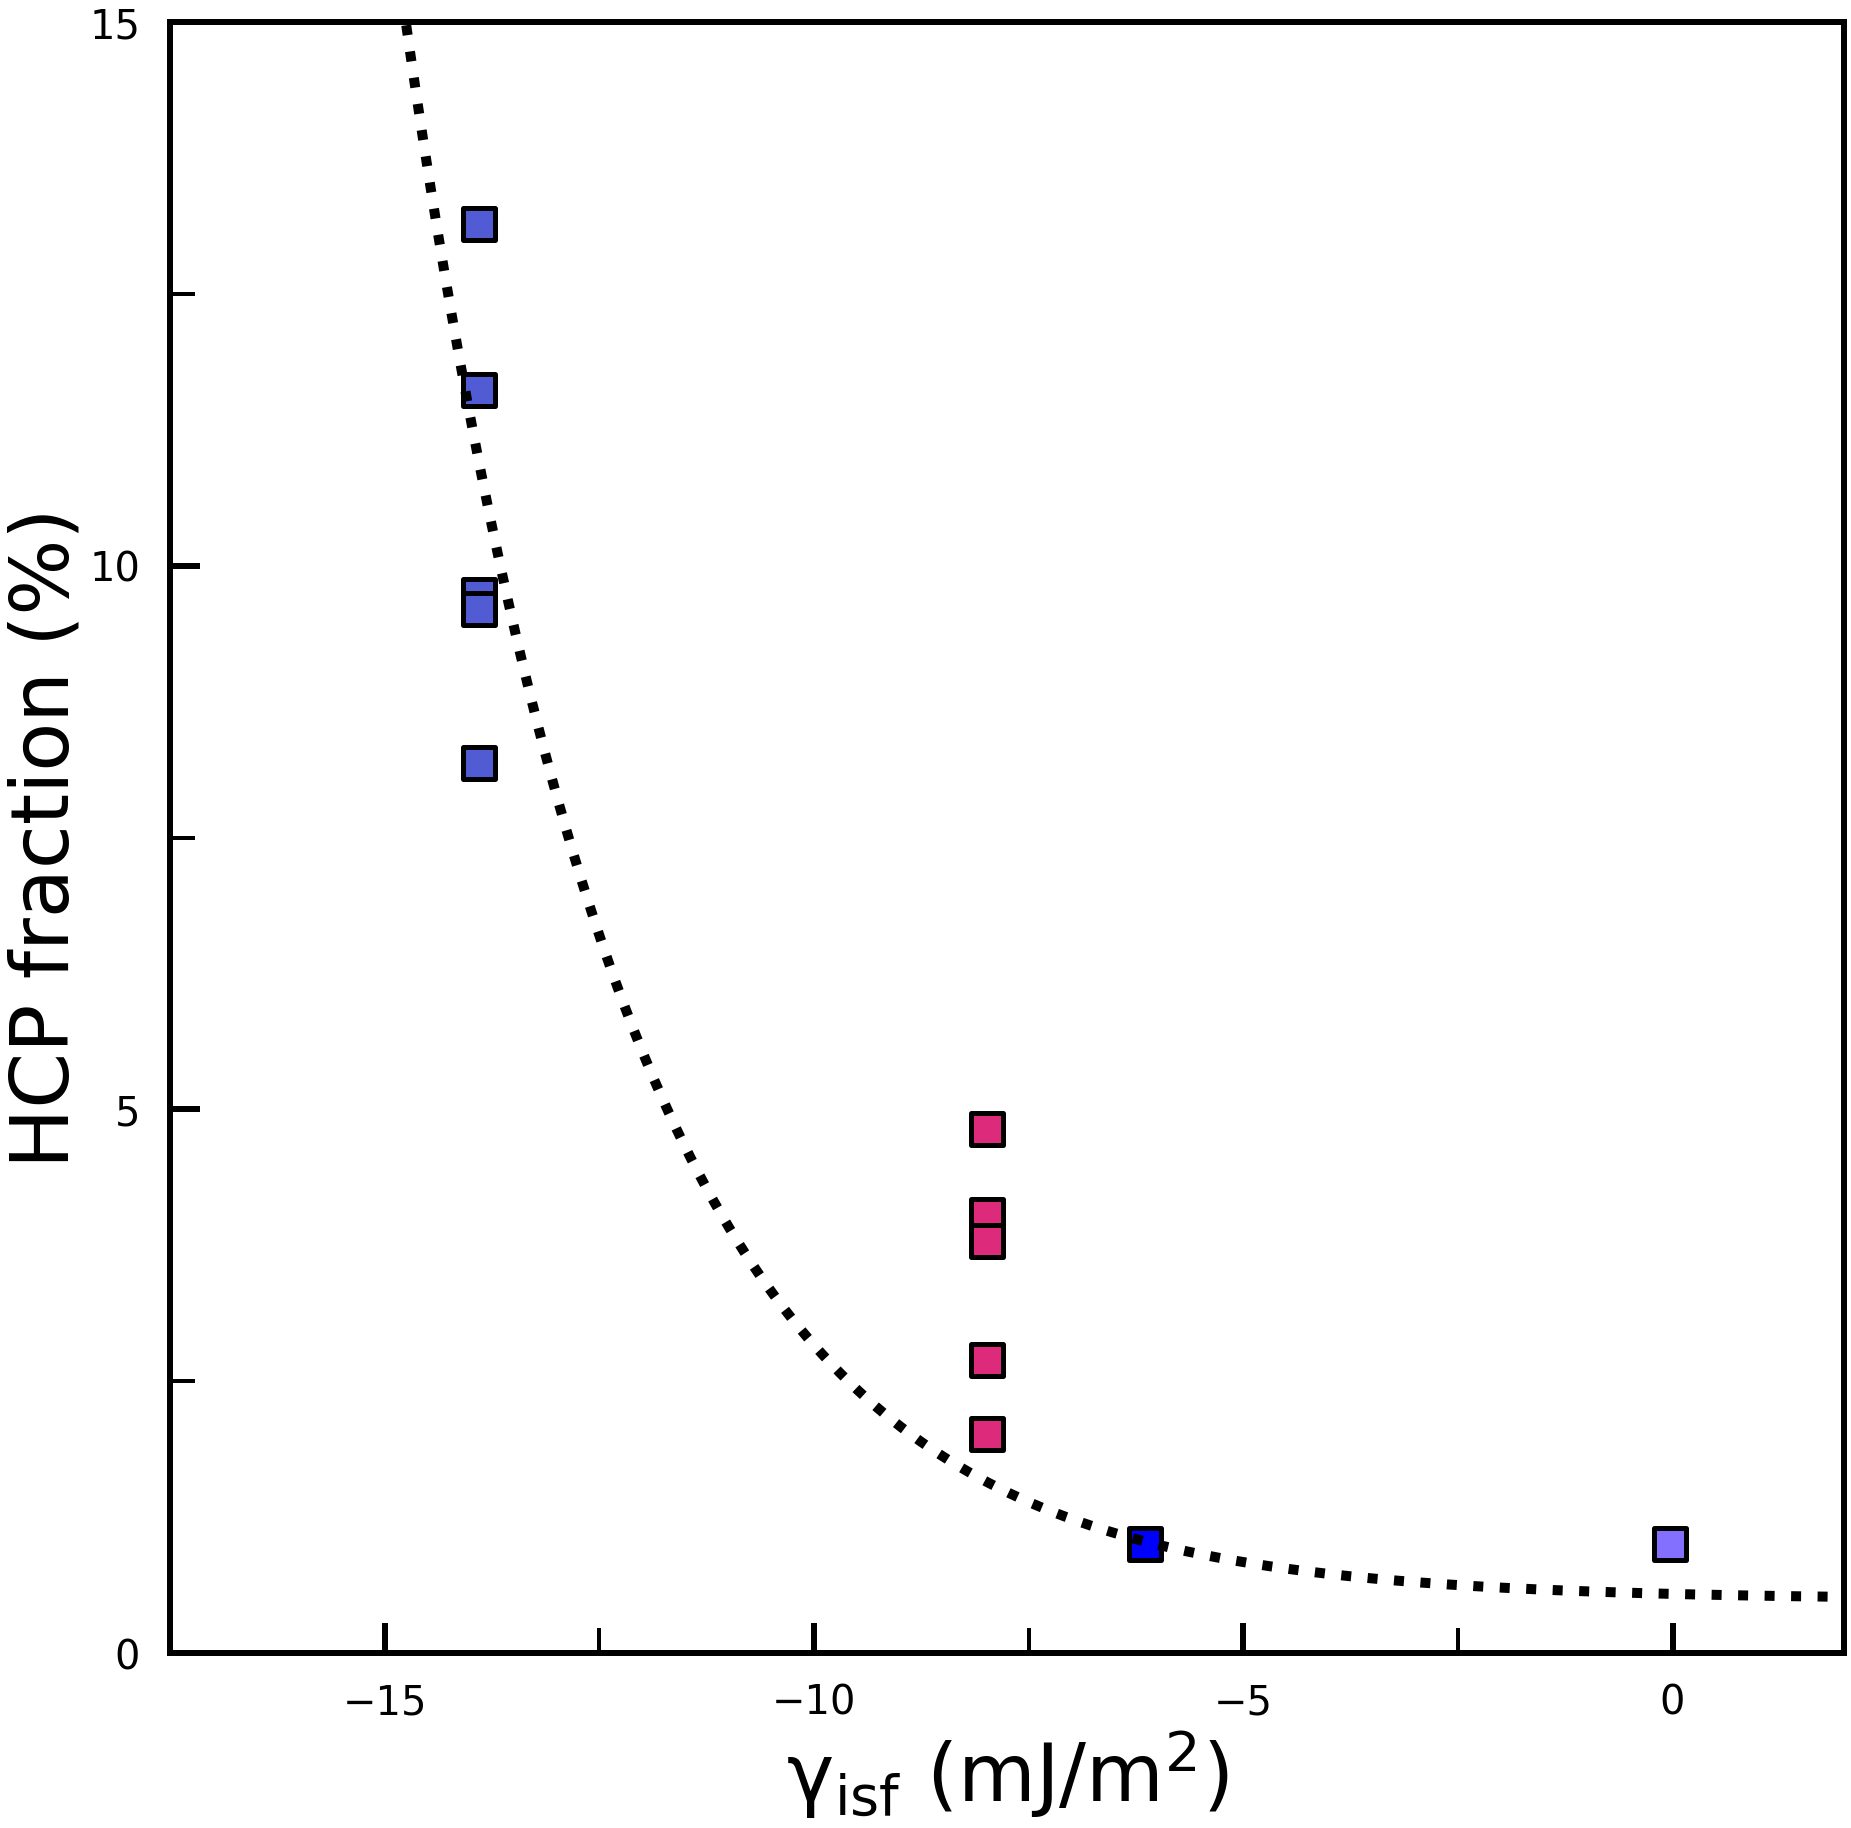

In [22]:
hcp_4030 = np.array([8.46, 4.727, 8.156, 9.159, 5.64, 12.3, 17.8, 11.81])
print(np.mean(hcp_4030))
sfe_4030 = np.array([-12.46]*8)
hcp_4020 = np.array([0])
sfe_4020 = np.array([-6.14])
hcp_4520 = np.array([4.027, 2.014, 3.794, 2.692, 4.82])
sfe_4520 = np.array([-7.98]*5)
print(np.mean(hcp_4520))
hcp_4525 = np.array([13.14, 8.19, 9.73, 11.62, 9.605])
sfe_4525 = np.array([-13.9]*5)
print(np.mean(hcp_4525))
hcp_4040 = np.array([18, 6.28, 22.5, 17.22, 41.85, 24.39, 37.98])
sfe_4040 = np.array([-15.5]*7)
print(np.mean(hcp_4040))
hcp_4515 = np.array([0])
sfe_4515 = np.array([-0.03])

mean_hcp = np.array([np.mean(hcp_4515), np.mean(hcp_4020), np.mean(hcp_4520), np.mean(hcp_4525), np.mean(hcp_4040)])
sfe_list = np.array([-0.03, -6.14, -7.98, -13.9, -16])

def exp(x, k, a, b):
    return k*np.exp(-x*a/(77*1.38065)) + b

params = curve_fit(exp, sfe_list, mean_hcp)
k_sh, a_sh, b_sh = params[0]

class MyLocator(matplotlib.ticker.AutoMinorLocator):
    def __init__(self, n=2):
        super().__init__(n=n)
matplotlib.ticker.AutoMinorLocator = MyLocator  

new_ticksy = np.linspace(-5, 50, 12)
new_ticksx = np.linspace(-20, 0, 5)
figsize = 30, 30
figure, ax = plt.subplots(figsize = figsize)
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
plt.tick_params(labelsize=23, which = 'major', length = 30, width = 6, direction='in', color = 'k')
plt.tick_params(which = 'minor', length = 25, width = 4, direction='in', color = 'k')

labels = ax.get_xticklabels() + ax.get_yticklabels()
plt.ylabel('HCP fraction (%)', fontsize = 80, c = 'k')
plt.xlabel('$\mathregular{\gamma_{isf}}$ ($\mathregular{mJ/m^2}$)', fontsize = 80, c = 'k')
plt.xticks(new_ticksx, c = 'k', fontsize = 40)
plt.yticks(new_ticksy, c = 'k', fontsize = 40)
plt.axis([-17.5, 2, 0, 15])
ax.tick_params(pad = 30)
bwith = 6
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)


x = np.linspace(-20, 5, 10000)
hcp_pred = k_sh*np.exp(-x*a_sh/(77*1.38065)) + b_sh
hcp_meanpred = k_sh*np.exp(-sfe_list*a_sh/(77*1.38065)) + b_sh
plt.plot(x, hcp_pred, color = 'k', linewidth = 10, linestyle = 'dotted', zorder = 1)

# 4020, 4515, 4520, 4030, 4525
plt.scatter(-6.14, 1, s = 1000, c = '#0000FF', marker = 's', 
            edgecolors = 'k', linewidth = 5)
plt.scatter(-0.03, 1, s = 1000, c = '#8470FF', marker = 's', 
            edgecolors = 'k', linewidth = 5)
plt.scatter(sfe_4520, hcp_4520, s = 1000, c = '#dd2a7b', marker = 's', 
            edgecolors = 'k', linewidth = 5)
# plt.scatter(sfe_4030, hcp_4030, s = 1000, c = '#8134af', marker = 's', 
#             edgecolors = 'k', linewidth = 5)
plt.scatter(sfe_4525, hcp_4525, s = 1000, c = '#515bd4', marker = 's', 
            edgecolors = 'k', linewidth = 5)
# plt.scatter(sfe_4040, hcp_4040, s = 1000, c = '#8B1A1A', marker = 's', 
#             edgecolors = 'k', linewidth = 5)

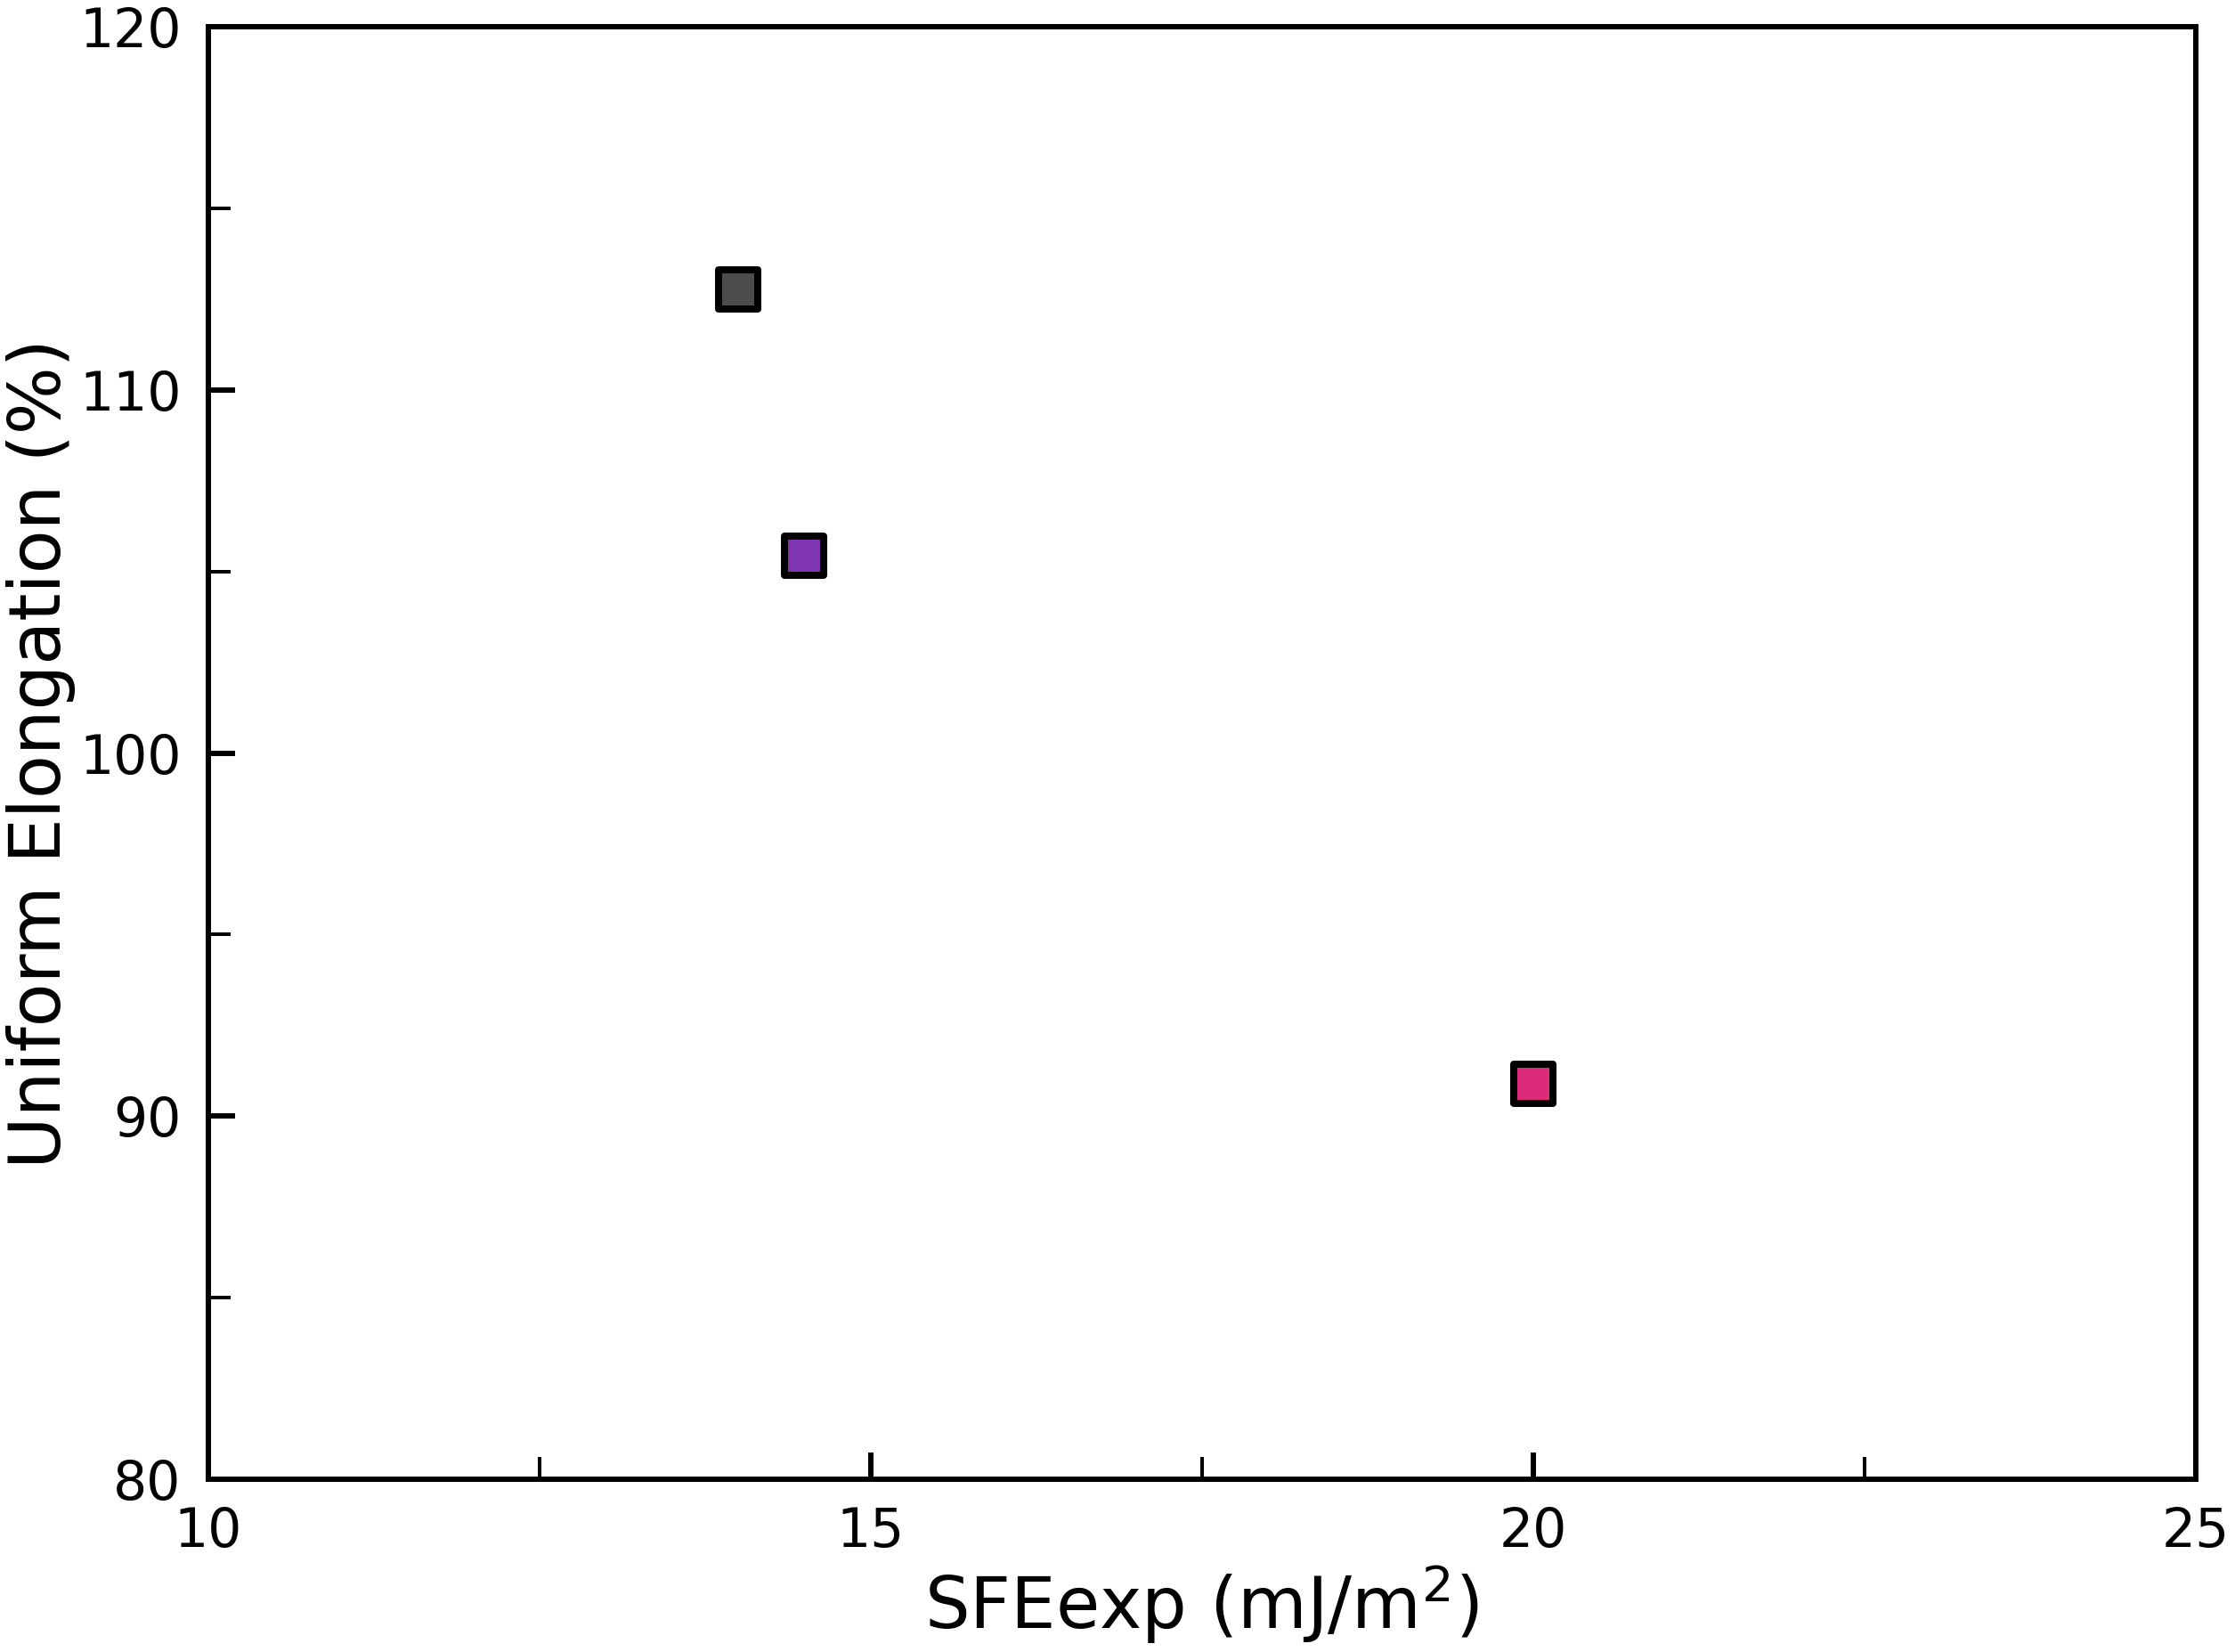

In [29]:
uni_el = np.array([112.76, 105.43, 90.9])
sfe_exp = np.array([14, 14.5, 20])

class MyLocator(matplotlib.ticker.AutoMinorLocator):
    def __init__(self, n=2):
        super().__init__(n=n)
matplotlib.ticker.AutoMinorLocator = MyLocator  

new_ticksy = np.linspace(50, 150, 11)
new_ticksx = np.linspace(0, 30, 7)
figsize = 40, 30
figure, ax = plt.subplots(figsize = figsize)
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
plt.tick_params(labelsize=23, which = 'major', length = 30, width = 6, direction='in', color = 'k')
plt.tick_params(which = 'minor', length = 25, width = 4, direction='in', color = 'k')

labels = ax.get_xticklabels() + ax.get_yticklabels()
plt.ylabel('Uniform Elongation (%)', fontsize = 80, c = 'k')
plt.xlabel('SFEexp ($\mathregular{mJ/m^2}$)', fontsize = 80, c = 'k')
plt.xticks(new_ticksx, c = 'k', fontsize = 60)
plt.yticks(new_ticksy, c = 'k', fontsize = 60)
plt.axis([10, 25, 80, 120])
ax.tick_params(pad = 30)
bwith = 6
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

#*3333
plt.scatter(sfe_exp[0], uni_el[0], s = 2000, color = '#4D4D4D', marker = 's', edgecolor = 'k', linewidth=8)
#*4520
plt.scatter(sfe_exp[1], uni_el[1], s = 2000, color = '#8134af', marker = 's', edgecolor = 'k', linewidth=8)
#*4515
plt.scatter(sfe_exp[2], uni_el[2], s = 2000, color = '#dd2a7b', marker = 's', edgecolor = 'k', linewidth=8)